<a href="https://colab.research.google.com/github/linarahmatin/2341720029_ML_2025/blob/main/JS05/TG1_JS05_2341720029_Sesy_Tana_Lina_Rahmatin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praktikum 1


In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

In [ ]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


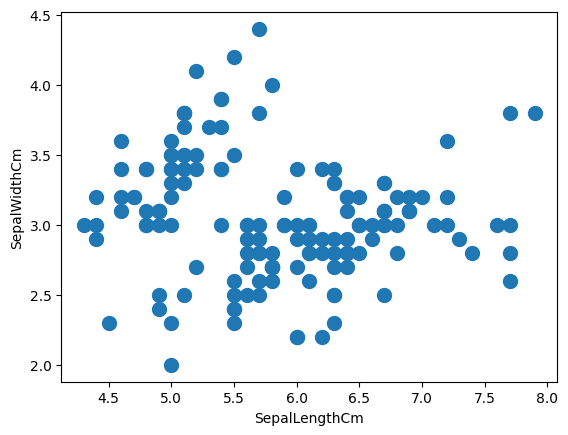

In [ ]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

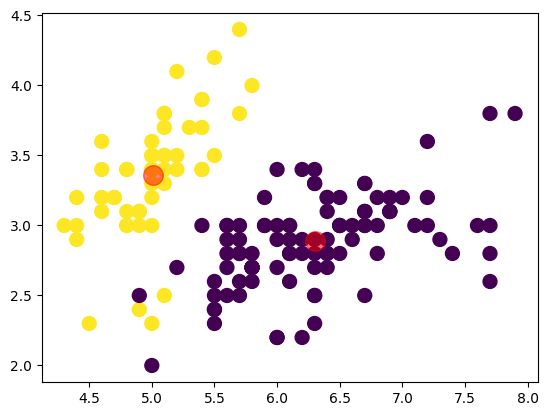

In [ ]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


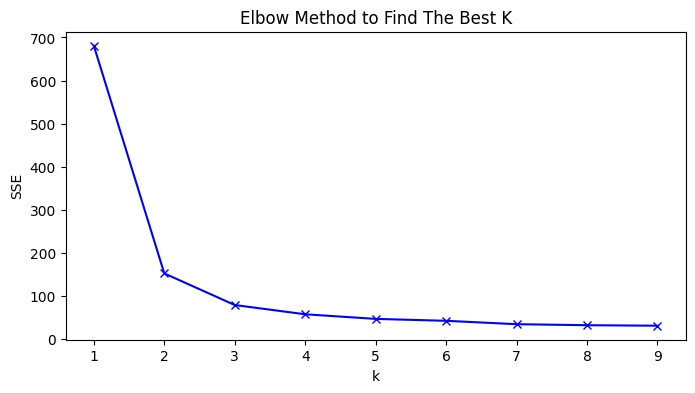

In [ ]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

#Praktikum 2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

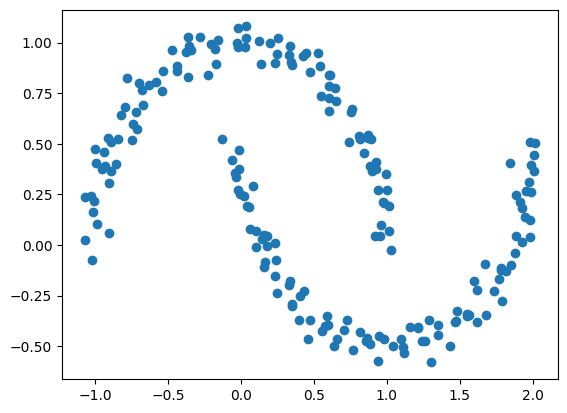

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

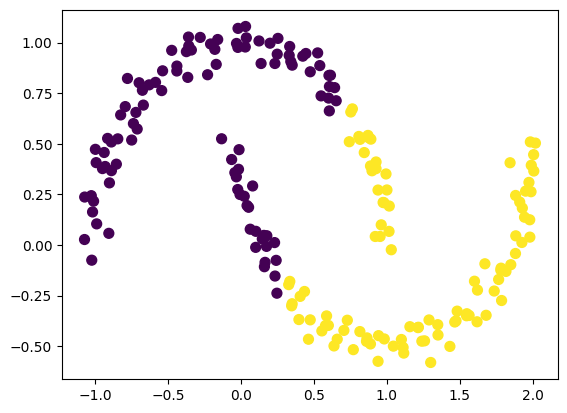

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


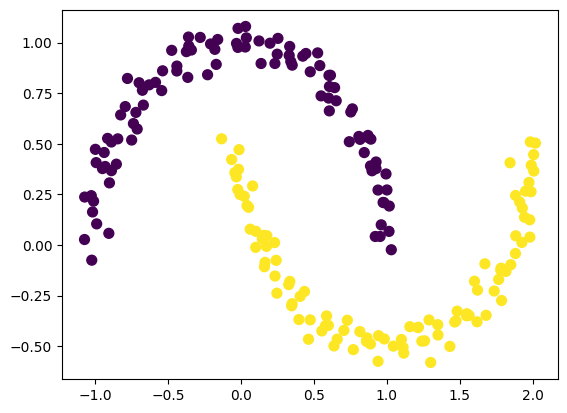

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Hasil 0.32585318950197517

0.32585318950197517


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Hasilnya
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


#Praktikum 3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

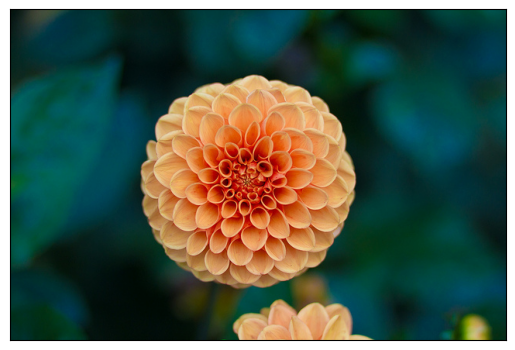

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [ ]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

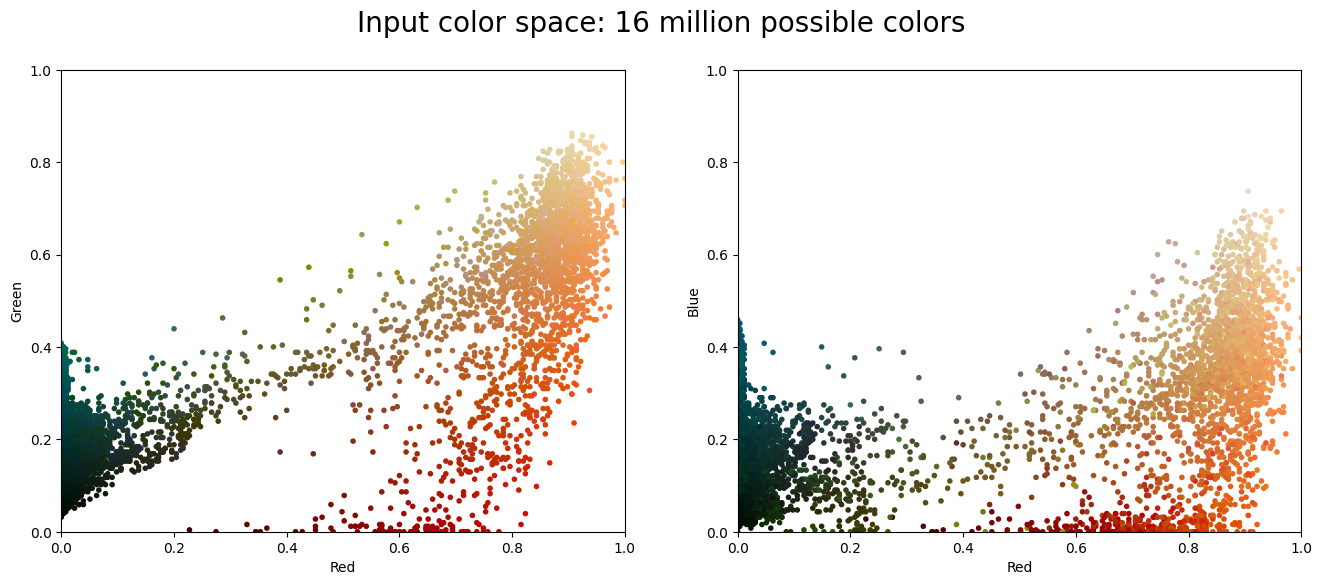

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

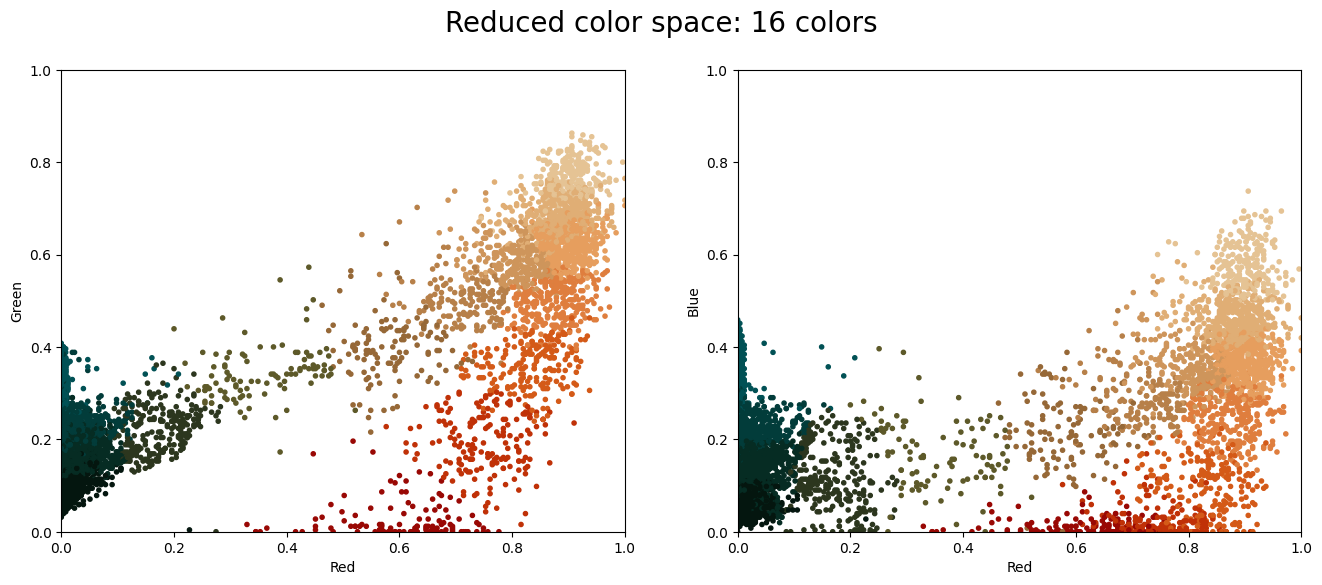

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

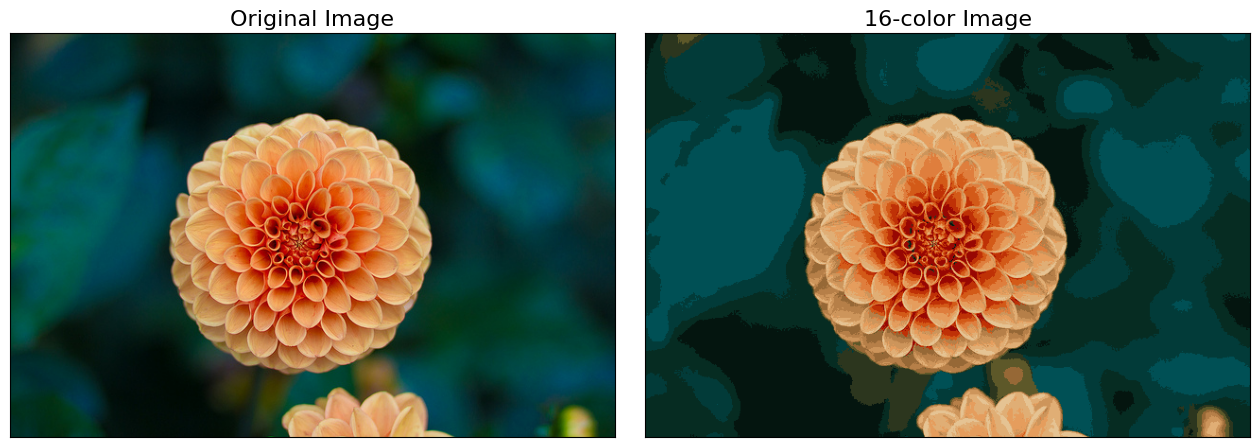

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

#Tugas Praktikum

1. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?

Scatterplot antara Avg_Credit_Limit dan Total_Credit_Card menunjukkan bahwa data tidak membentuk pola garis lurus, melainkan menyebar dalam kelompok-kelompok tertentu sehingga sebarannya tidak dapat dikatakan linier.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
df = pd.read_csv('/content/CC_Customer_Dataset.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


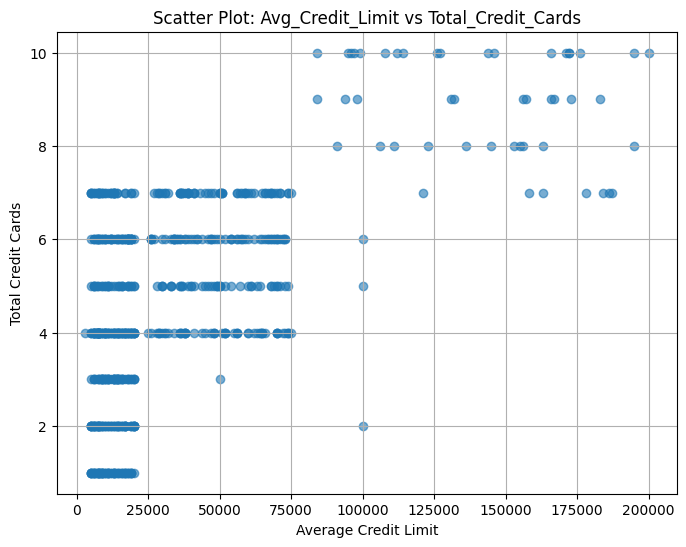

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'], alpha=0.6)
plt.title('Scatter Plot: Avg_Credit_Limit vs Total_Credit_Cards')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.grid(True)
plt.show()

In [ ]:
corr = df['Avg_Credit_Limit'].corr(df['Total_Credit_Cards'])
print(f"Koefisien korelasi Pearson: {corr:.3f}")

Koefisien korelasi Pearson: 0.609


In [ ]:
if abs(corr) > 0.7:
    hubungan = "kuat"
elif abs(corr) > 0.4:
    hubungan = "sedang"
else:
    hubungan = "lemah"

print(f"Hubungan liniernya bersifat {hubungan}.")

Hubungan liniernya bersifat sedang.


2. Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah
k
k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

analisisnya: karena setelah itu penambahan cluster tidak memberikan peningkatan signifikan.

In [ ]:
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

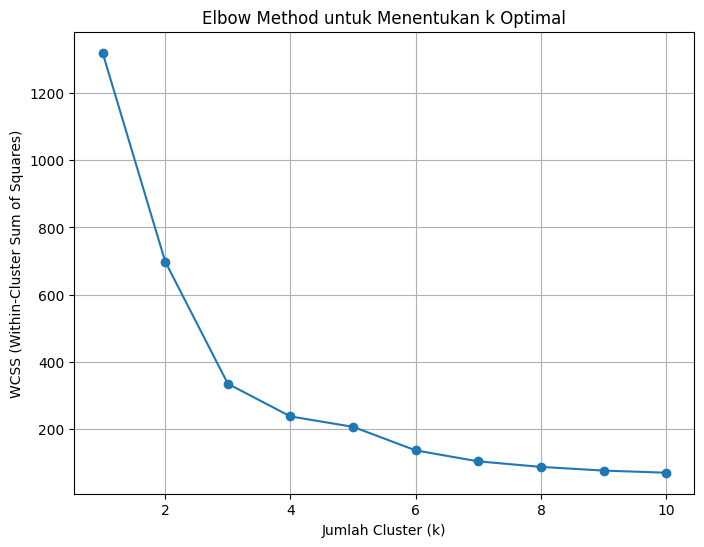

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(K, wcss, 'o-', markersize=6)
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [ ]:
k_optimal = 3  # ubah sesuai titik siku grafik elbow kamu
kmeans_model = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans_model.fit_predict(X_scaled)

In [ ]:
df['Cluster'] = clusters

In [ ]:
print(df[['Avg_Credit_Limit','Total_Credit_Cards','Cluster']].head())

   Avg_Credit_Limit  Total_Credit_Cards  Cluster
0            100000                   2        2
1             50000                   3        2
2             50000                   7        0
3             30000                   5        0
4            100000                   6        0


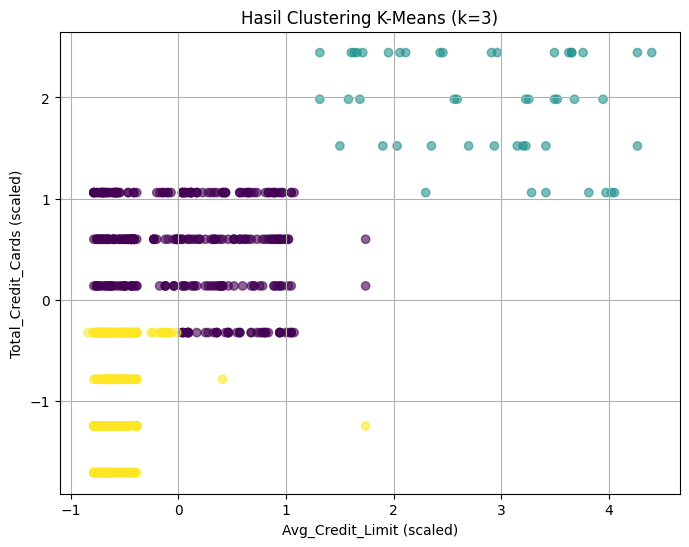

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f'Hasil Clustering K-Means (k={k_optimal})')
plt.xlabel('Avg_Credit_Limit (scaled)')
plt.ylabel('Total_Credit_Cards (scaled)')
plt.grid(True)
plt.show()

3. Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.

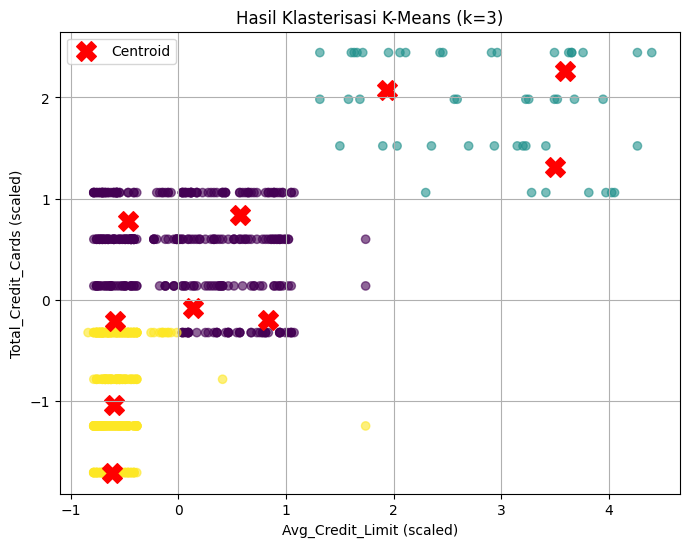

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroid')
plt.title('Hasil Klasterisasi K-Means (k=3)')
plt.xlabel('Avg_Credit_Limit (scaled)')
plt.ylabel('Total_Credit_Cards (scaled)')
plt.legend()
plt.grid(True)
plt.show()

4. Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan.

In [ ]:
X = df.drop(['Sl_No', 'Customer Key'], axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

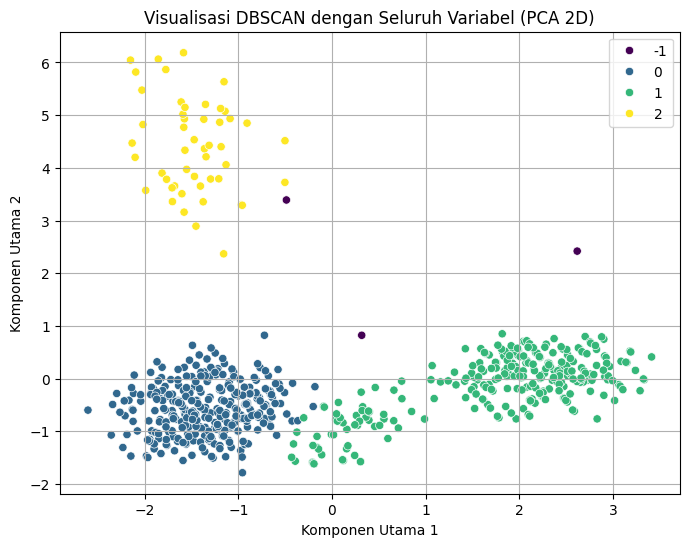

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=clusters,
    palette='viridis',
    legend='full'
)
plt.title('Visualisasi DBSCAN dengan Seluruh Variabel (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.grid(True)
plt.show()

5. Tentukan jumlah
k
k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.

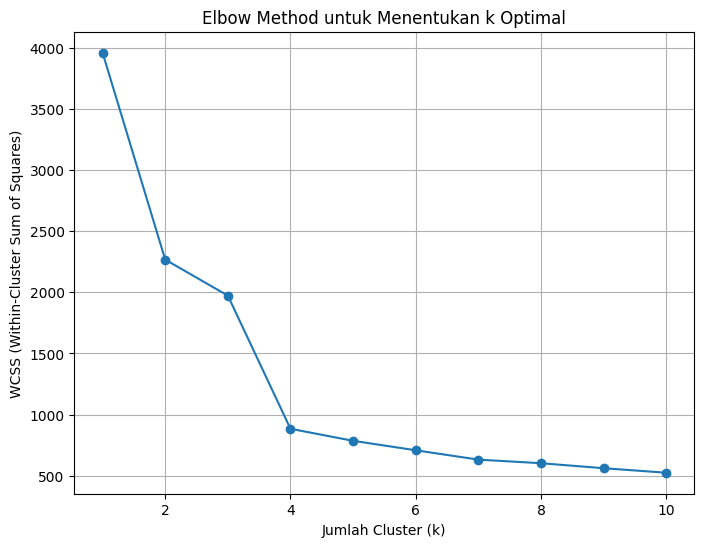

In [ ]:
wcss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 5. Plot linechart Elbow Method
plt.figure(figsize=(8,6))
plt.plot(K, wcss, 'o-', markersize=6)
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

Grafik Elbow Method menunjukkan penurunan WCSS tajam hingga k=3 dan melandai setelahnya, sehingga k=3 dipilih sebagai jumlah cluster optimal. Dengan tiga cluster ini, data pelanggan sudah terbagi jelas menurut kombinasi variabel yang digunakan sehingga analisis pola menjadi lebih mudah.

6. Tentukan nilai silhouette score dan DBI dari model DBSCAN.

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

unique_labels = set(labels)
if len(unique_labels - {-1}) > 1:  # pastikan ada lebih dari 1 cluster sah
    sil_score = silhouette_score(X_scaled, labels)
    dbi_score = davies_bouldin_score(X_scaled, labels)
    print(f"Silhouette Score: {sil_score:.3f}")
    print(f"Davies-Bouldin Index (DBI): {dbi_score:.3f}")
else:
    print("Silhouette Score & DBI tidak dapat dihitung: hanya satu cluster atau semua outlier.")

Silhouette Score: 0.496
Davies-Bouldin Index (DBI): 1.233
